In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import xarray as xr
import sys
import inspect
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_whittaker(tas_data, pr_data, nlines, temps, precips, temps_array, precips_array):
    # Constants and calculations for area
    R = 6371000  # Earth's radius in meters
    # Calculate the latitudinal boundaries of the grid cells
    lat_bounds = np.radians(np.linspace(-90, 90, len(pr_data_land_avg['lat']) + 1))

    dlat = np.sin(lat_bounds[1:]) - np.sin(lat_bounds[:-1])
    dlon = np.radians(2.8125)  # The difference in longitude in radians
    areas = R**2 * dlon * dlat
    areas_2d = np.outer(areas, np.ones(pr_data_land_avg['lon'].shape[0]))

    # Flattening and cleaning the data
    tas_flat = tas_data.values.flatten()
    pr_flat = pr_data.values.flatten()
    areas_flat = areas_2d.flatten()
    
    # Remove NaN values
    valid_indices = np.isfinite(tas_flat) & np.isfinite(pr_flat)
    tas_flat = tas_flat[valid_indices]
    pr_flat = pr_flat[valid_indices]
    areas_flat = areas_flat[valid_indices]

    # Conversions
    pr_flat_mm_day = pr_flat * 86400 * 1000 * 1000 / (1000 * 1000) # Convert precipitation from kg m-2 s-1 to mm/day
    tas_flat_celsius = tas_flat - 273.15 # Convert temperature from K to °C
    areas_flat_km2 = areas_flat * 1e-6 # Convert areas from m² to km²

    # Further conversions
    pr_flat_mm_year = pr_flat_mm_day * 365.25
    
    # Create the 2D histogram weighted by the areas (with units converted)
    hist, xedges, yedges = np.histogram2d(tas_flat_celsius, pr_flat_mm_year, bins=50, weights=areas_flat_km2)

    # Create a masked array for the histogram data where zero values are masked
    hist_masked = np.ma.masked_where(hist == 0, hist)
    levels = np.logspace(np.log10(hist_masked.min()+1e-5), np.log10(hist_masked.max()), 15)

   
    precips_mm = [precip * 10 for precip in precips]
    precips_array_mm = [precip_array * 10 for precip_array in precips_array]

    # Plotting
    # Define custom colors
    colors = ['white', '#9595CA', '#4757A7', '#354BA0', '#106A71', '#29B34B', '#74C043', '#CCDB29', '#FDD107', '#F26821', '#ED1F24']
    cmap = ListedColormap(colors)

    plt.figure(figsize=(10, 6))
    plt.imshow(hist_masked.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap= cmap, norm=LogNorm(), aspect='auto')

    for i in range(nlines):
        plt.plot(temps[i], precips_mm[i], 'k-', linewidth=1)

    for i in range(len(temps_array)):
        plt.plot(temps_array[i], precips_array_mm[i], 'k-', linewidth=1)

    plt.colorbar(label='Area (km²)')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Precipitation (mm/year)')
    plt.title('Area-Weighted 2D Histogram with Whittaker Plot Overlay')
    # Set the x and y axis limits as specified
    plt.xlim(-30, 40)
    plt.ylim(0, 8000)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()




/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the biome data from the provided Python file
biome_filepath = 'data/biomes_data.py'
import sys

# List all the variable names defined in the uploaded Python file
with open(biome_filepath, 'r') as file:
    exec(file.read())

# Get the names of all variables defined in the file
import inspect
# Get the names of all variables defined in the file
defined_vars = [item[0] for item in inspect.getmembers(sys.modules['__main__']) if not item[0].startswith('_')]

In [3]:
import xarray as xr
import rioxarray
tas_data_land_avg_file = 'data/CMIP_hist_1960_1979_10models_lt0mask_mean_27000m_tas.tif'
pr_data_land_avg_file  = 'data/CMIP_hist_1960_1979_10models_lt0mask_mean_27000m_pr.tif'
biome_filepath = 'data/biomes_data.py'
# Open into an xarray.DataArray
tas_data_land_avg = rioxarray.open_rasterio(tas_data_land_avg_file)
pr_data_land_avg = rioxarray.open_rasterio(pr_data_land_avg_file)


# Rename the variable to a more useful name
tas_data_land_avg = tas_data_land_avg.rename({'x': 'lon', 'y': 'lat','band':'tas'})
pr_data_land_avg = pr_data_land_avg.rename({'x': 'lon', 'y': 'lat','band':'tas'})


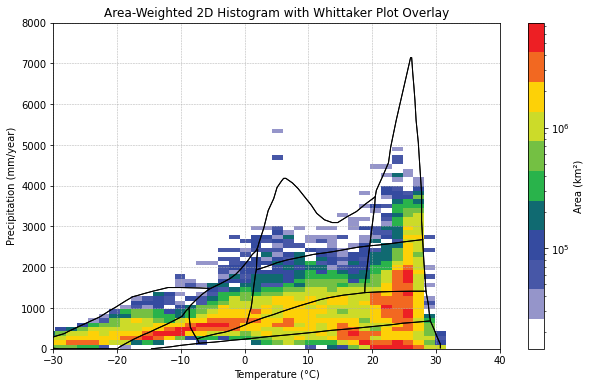

In [4]:
plot_whittaker(tas_data_land_avg, pr_data_land_avg, nlines, temps, precips, temps_array, precips_array)
# plot_whittaker(tas_data_land_avg, pr_data_land_avg, biome_filepath)

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def plot_whittaker_new(tas_data, pr_data, nlines, temps, precips, temps_array, precips_array):
    # Constants and calculations for area
    R = 6371000  # Earth's radius in meters
    # Calculate the latitudinal boundaries of the grid cells
    lat_bounds = np.radians(np.linspace(-90, 90, len(pr_data_land_avg['lat']) + 1))

    dlat = np.sin(lat_bounds[1:]) - np.sin(lat_bounds[:-1])
    dlon = np.radians(2.8125)  # The difference in longitude in radians
    areas = R**2 * dlon * dlat
    areas_2d = np.outer(areas, np.ones(pr_data_land_avg['lon'].shape[0]))

    # Flattening and cleaning the data
    tas_flat = tas_data.values.flatten()
    pr_flat = pr_data.values.flatten()
    areas_flat = areas_2d.flatten()
    
    # Remove NaN values
    valid_indices = np.isfinite(tas_flat) & np.isfinite(pr_flat)
    tas_flat = tas_flat[valid_indices]
    pr_flat = pr_flat[valid_indices]
    areas_flat = areas_flat[valid_indices]

    # Conversions
    pr_flat_mm_day = pr_flat * 86400 * 1000 * 1000 / (1000 * 1000) # Convert precipitation from kg m-2 s-1 to mm/day
    tas_flat_celsius = tas_flat - 273.15 # Convert temperature from K to °C
    areas_flat_km2 = areas_flat * 1e-6 # Convert areas from m² to km²

    # Further conversions
    pr_flat_mm_year = pr_flat_mm_day * 365.25
    
    # Create the 2D histogram weighted by the areas (with units converted)
    hist, xedges, yedges = np.histogram2d(tas_flat_celsius, pr_flat_mm_year, bins=50, weights=areas_flat_km2)

    # Create a masked array for the histogram data where zero values are masked
    hist_masked = np.ma.masked_where(hist == 0, hist)
    levels = np.logspace(np.log10(hist_masked.min()+1e-5), np.log10(hist_masked.max()), 15)

   
    precips_mm = [precip * 10 for precip in precips]
    precips_array_mm = [precip_array * 10 for precip_array in precips_array]


    # Plotting
    plt.figure(figsize=(12, 8))

    # Define custom colors
    colors = ['white', '#9595CA', '#4757A7', '#354BA0', '#106A71', '#29B34B', '#74C043', '#CCDB29', '#FDD107', '#F26821', '#ED1F24']
    cmap = ListedColormap(colors)

    # Define boundaries for the colors
    bounds = [0, 2000, 20000, 75000, 100000, 150000, 240000, 700000, 1700000, 3500000, 4500000, 6000000]
    norm = BoundaryNorm(bounds, cmap.N)
    # Check the minimum and maximum of your data (hist_masked in this case)
    print(f"Data min: {hist_masked.min()}")
    print(f"Data max: {hist_masked.max()}")

    # If your data's min and max are outside the bounds, you need to adjust the bounds accordingly.
    # Create a contour plot
    # Ensure the levels are in increasing order and within the range of your data
    contourf = plt.contourf(xedges[:-1], yedges[:-1], hist_masked.T, levels=bounds, cmap=cmap, norm=norm, extend='both')

    
    # Create a contour plot using the histogram data. The levels are automatically chosen.
    contourf = plt.contourf(xedges[:-1], yedges[:-1], hist_masked.T, cmap=cmap, norm=norm, extend='both', levels=bounds)

    # Add a colorbar corresponding to the contour levels
    cbar = plt.colorbar(contourf, extend='both')
    cbar.set_label('Area (km²)')
    cbar.set_ticks(bounds)
    cbar.set_ticklabels([f'{bound:.0f}' for bound in bounds])

    for i in range(nlines):
        plt.plot(temps[i], precips_mm[i], 'k-', linewidth=1)

    for i in range(len(temps_array)):
        plt.plot(temps_array[i], precips_array_mm[i], 'k-', linewidth=1)

    plt.xlabel('Temperature (°C)', fontsize = 20)
    plt.ylabel('Precipitation (mm/year)', fontsize = 20)
    plt.title('Area-Weighted Contour Plot with Whittaker Plot Overlay \n CMIP 6 ensemble models', size = 20)
    plt.xlim(-30, 40)
    plt.ylim(0, 8000)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.show()
    


Data min: 14577.151600682593
Data max: 7430852.315153771


<ipython-input-5-8a33bdae9d8b>:71: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(contourf, extend='both')


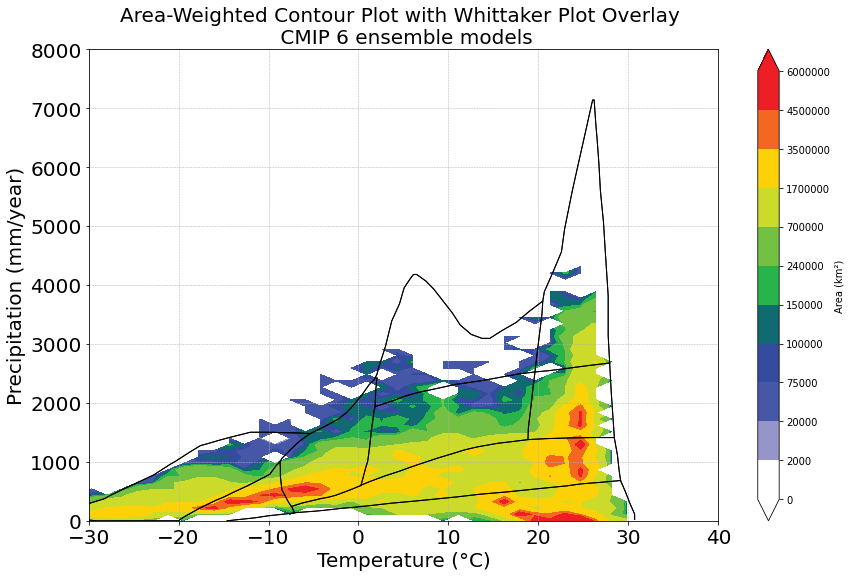

In [6]:
plot_whittaker_new(tas_data_land_avg, pr_data_land_avg, nlines, temps, precips, temps_array, precips_array)
